## 로지스틱 회귀
- 반응 변수가 범주형인 경우에 적용하는 회귀 분석
- 반응 변수 Y를 직접 모델링 하지 않고 Y가 특정 범주에 속하는 확률을 모델링

In [2]:
import pandas as pd
import numpy as np

In [3]:
## 데이터 로드
body = pd.read_csv('../data/bodyPerformance.csv')
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [4]:
## 바이너리 형태로 데이터 변환
## 이진 분류로 데이터 전처리
body['gender'] = np.where(body['gender'] == 'M', 0, 1)
body['class_1'] = np.where(body['class'] == 'A', 1, 0)
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,0
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,0
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,1
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,0


In [5]:
## 데이터 분할
from sklearn.model_selection import train_test_split

feature_columns = list(body.columns.difference(['class', 'class_1']))
x = body[feature_columns]
y = body['class_1']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, train_size = 0.7, random_state = 1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(9375, 11) (4018, 11) (9375,) (4018,)


In [6]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()
logR.fit(x_train, y_train)

C:\Users\이은진\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
## 확률 추정 로그 예측
proba = pd.DataFrame(logR.predict_log_proba(x_train))
## confidence score
cs = logR.decision_function(x_train)

## 두 데이터의 결합
df = pd.concat([proba, pd.DataFrame(cs)], axis = 1)
df.columns = ['Not A', 'A', 'decision_function']

df.sort_values(['decision_function'], inplace = True)
df.reset_index(drop = True, inplace = True)

df

C:\Users\이은진\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1402: RuntimeWarning: divide by zero encountered in log
  return np.log(self.predict_proba(X))


,Not A,A,decision_function
0,-2.522525e-08,-17.495420,-17.495420
1,-6.571903e-08,-16.537877,-16.537877
2,-8.177328e-08,-16.319315,-16.319315
3,-1.041409e-07,-16.077521,-16.077521
4,-1.070427e-07,-16.050038,-16.050038
...,...,...,...
9370,-5.910234e+00,-0.002715,5.907518
9371,-5.989883e+00,-0.002507,5.987376
9372,-6.094527e+00,-0.002258,6.092269
9373,-6.582485e+00,-0.001385,6.581099


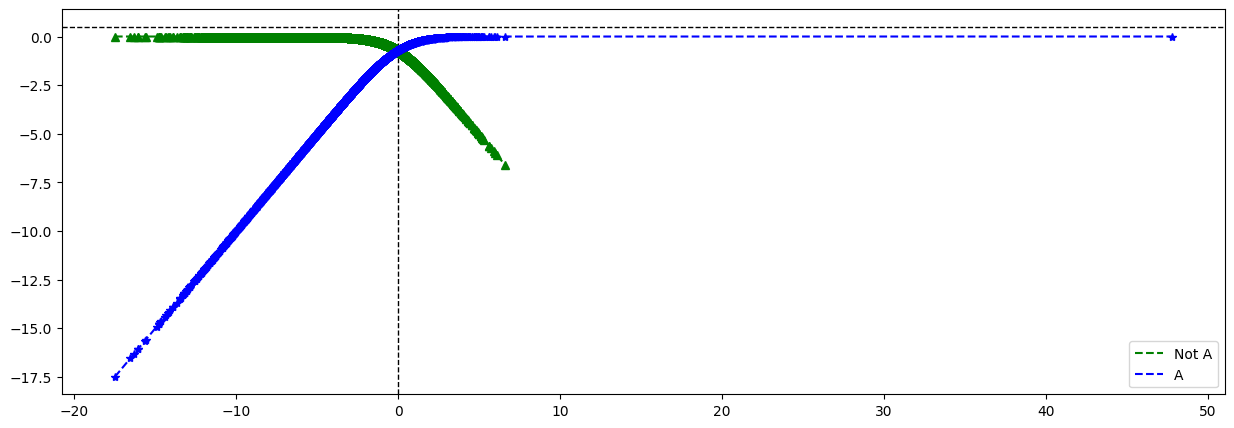

In [12]:
## confidence score를 기준으로 시각화
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 5))

plt.axhline(y = 0.5, linestyle = '--', color = 'black', linewidth = 1)
plt.axvline(x = 0, linestyle = '--', color = 'black', linewidth = 1)

plt.plot(df['decision_function'], df['Not A'], 'g--', label = 'Not A')
plt.plot(df['decision_function'], df['Not A'], 'g^')
plt.plot(df['decision_function'], df['A'], 'b--', label = 'A')
plt.plot(df['decision_function'], df['A'], 'b*')

plt.legend()

plt.show()

## confidence score에 따른 클래스 확률 값을 매칭시키면 A 클래스에 속한 추정 확률과 결정경계(blue)를 얻을 수 있다.

In [13]:
## 분류 모델의 성능 평가
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = logR.predict(x_test)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print('혼동행렬 :', test_cm)
print('정확도 :', round(test_acc*100, 2))
print('정밀도 :', round(test_acc*100, 2))
print('재현율 :', round(test_rcll*100, 2))
print('F1 :', round(test_f1*100, 2))


혼동행렬 : [[2747  267]
 [ 343  661]]
정확도 : 84.82
정밀도 : 84.82
재현율 : 65.84
F1 : 68.43


- 다중 클래스를 지원하는 로지스틱 회귀
- 다중 로지스틱 회귀, 소프트맥스 회귀라 한다.

In [14]:
body = pd.read_csv('../data/bodyPerformance.csv')

In [15]:
body['gender'] = np.where(body['gender'] == 'M', 0, 1)
## 클래스는 A인 경우 0, B인 경우 1, C인 경우 2, D인 경우 3
mapping = {
    'A' : 0,
    'B' : 1,
    'C' : 2,
    'D' : 3
}
body['class_2'] = body['class'].map(mapping)
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_2
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,2
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,2
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,1
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,2
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,3
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,0
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,3


In [16]:
feature_columns = list(body.columns.difference(['class', 'class_2']))
x = body[feature_columns]
y = body['class_2']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, train_size = 0.7, random_state = 1)

In [17]:
## multi_class : 클래스의 타입을 지정 ovr : 바이너리, multinomial : 다중 클래스ㅡ 기본 값은 auto
## solver : 최적화 문제를 푸는 해를 구할 때 사용하는 알고리즘 지정, 기본 값 1bfgs
## C : 정규화 강도의 역수 기본값 1.0

softm = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C = 10)
softm.fit(x_train, y_train)

C:\Users\이은진\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, multi_class='multinomial')

In [18]:
pred = softm.predict(x_test)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)

print(test_cm)
print('정확도 :', round(test_acc*100, 2))

[[707 261  36   0]
 [269 403 299  33]
 [ 92 207 525 181]
 [ 13  63 157 772]]
정확도 : 59.91


In [20]:
softm.predict([x_test.iloc[-1, :]])
# 클래스가 0일 확률이 젤 높다는 의미

C:\Users\이은진\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [21]:
## 가장 마지막 인덱스에 값은 class가 0인 확률이 62%, 1인 확률은 31%, 2인 확률은 6%, 3인 확률은 0.1%
softm.predict_proba([x_test.iloc[-1, :]])

C:\Users\이은진\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.62640076, 0.31189854, 0.06015624, 0.00154446]])